# Uniswap API
-USDC/(W)ETH (0.05%) = 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640

-USDC/(W)ETH (0.3%) = 0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8

-USDC/(W)ETH (1%) = 0x7bea39867e4169dbe237d55c8242a8f2fcdcc387

-WBTC/WETH (0.3%) = 0xcbcdf9626bc03e24f779434178a73a0b4bad62ed

-WBTC/WETH (0.05%) = 0x4585fe77225b41b697c938b018e2ac67ac5a20c0

-WBTC/WETH (1%) = 0x6ab3bba2f41e7eaa262fa5a1a9b3932fa161526f

-DAI/USDC (0.01%) = 0x5777d92f208679db4b9778590fa3cab3ac9e2168

-DAI/USDC (.05%) = 0x6c6bc977e13df9b0de53b251522280bb72383700

-DAI/USDC (.3%) = 0xa63b490aa077f541c9d64bfc1cc0db2a752157b5

In [1]:
import requests
import json
import pandas as pd
import time

def unix_epoch_to_timestamp(unix_epochs, unit='s'):
    """
    Convert a list of Unix epoch times to human-readable timestamps, ensuring
    that input epochs are in a numeric format to avoid deprecation warnings.

    Parameters:
    - unix_epochs: A list or series of Unix epoch times (integers, floats, or numeric strings).
    - unit: The unit for the epoch time ('s' for seconds, 'ms' for milliseconds, etc.).

    Returns:
    - A Pandas Series of timestamps.
    """
    # Ensure unix_epochs is a Pandas Series
    if not isinstance(unix_epochs, pd.Series):
        unix_epochs = pd.Series(unix_epochs)
    
    # Convert any strings to numeric types explicitly to avoid FutureWarning
    unix_epochs_numeric = pd.to_numeric(unix_epochs, errors='coerce')
    
    return pd.to_datetime(unix_epochs_numeric, unit=unit)

In [16]:
# import requests
# import time
# from tqdm import tqdm  # Import tqdm for the progress bar

# def fetch_swaps(skip=0):
#     url = "https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v3"
#     query = """
#     {
#       swaps(first: 1000, skip: %d, where: {pool: "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8"}, orderBy: timestamp, orderDirection: asc) {
#         id
#         timestamp
#         token0 {
#           symbol
#         }
#         token1 {
#           symbol
#         }
#         amount0
#         amount1
#         amountUSD
#       }
#     }
#     """ % skip
#     response = requests.post(url, json={'query': query})
#     return response

# # Initialize the variables
# all_swaps = []
# skip = 0
# batch_size = 1000  # Assuming a batch size of 1000 for the 'first' parameter

# # Use tqdm for the progress bar. Assuming an arbitrary large number for total to allow for indefinite progress
# for _ in tqdm(range(7)):  # You might need to adjust the range based on your expectations of data size
#     response = fetch_swaps(skip)
#     data =response.json()
#     swaps = data.get("data", {}).get("swaps", [])
#     if not swaps:
#         print("No more swaps found, stopping...")
#         break  # Stop if no more swaps are returned
#     all_swaps.extend(swaps)
#     skip += batch_size  # Adjust skip for pagination
#     tqdm.write(f"Fetched {len(swaps)} swaps, total: {len(all_swaps)}")

# # After fetching is complete
# print(f"Total swaps fetched: {len(all_swaps)}")

In [3]:
import requests
import time
from tqdm import tqdm  # Import tqdm for the progress bar

def fetch_swaps(last_timestamp=0):
    url = "https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v3"
    # Adjust the query to use the timestamp as a cursor for pagination
    query = """
    {
      swaps(first: 1000, where: {pool: "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8", timestamp_gt: %d}, orderBy: timestamp, orderDirection: asc) {
        id
        timestamp
        token0 {
          symbol
        }
        token1 {
          symbol
        }
        amount0
        amount1
        amountUSD
      }
    }
    """ % last_timestamp
    response = requests.post(url, json={'query': query})
    return response

# Initialize variables
all_swaps = []
last_timestamp = 0

# Use tqdm for the progress bar. Remove the fixed range and replace with an indefinite loop.
while True:
    response = fetch_swaps(last_timestamp)
    data = response.json()
    swaps = data.get("data", {}).get("swaps", [])
    
    if not swaps:
        print("No more swaps found, stopping...")
        break  # Stop if no more swaps are returned

    all_swaps.extend(swaps)
    last_timestamp = int(swaps[-1]["timestamp"])  # Update last_timestamp with the timestamp of the last swap
    tqdm.write(f"Fetched {len(swaps)} swaps, total: {len(all_swaps)}, last ts: {unix_epoch_to_timestamp(last_timestamp).item()}")

# After fetching is complete
print(f"Total swaps fetched: {len(all_swaps)}")


Fetched 1000 swaps, total: 1000, last ts: 2021-05-06 21:03:07
Fetched 1000 swaps, total: 2000, last ts: 2021-05-08 22:48:48
Fetched 1000 swaps, total: 3000, last ts: 2021-05-10 12:22:46
Fetched 1000 swaps, total: 4000, last ts: 2021-05-12 03:42:37
Fetched 1000 swaps, total: 5000, last ts: 2021-05-13 01:52:53
Fetched 1000 swaps, total: 6000, last ts: 2021-05-13 17:10:20
Fetched 1000 swaps, total: 7000, last ts: 2021-05-14 13:09:09
Fetched 1000 swaps, total: 8000, last ts: 2021-05-15 14:48:14
Fetched 1000 swaps, total: 9000, last ts: 2021-05-16 11:16:19
Fetched 1000 swaps, total: 10000, last ts: 2021-05-16 22:27:31
Fetched 1000 swaps, total: 11000, last ts: 2021-05-17 12:36:38
Fetched 1000 swaps, total: 12000, last ts: 2021-05-18 00:06:15
Fetched 1000 swaps, total: 13000, last ts: 2021-05-18 17:07:35
Fetched 1000 swaps, total: 14000, last ts: 2021-05-19 04:24:18
Fetched 1000 swaps, total: 15000, last ts: 2021-05-19 10:54:17
Fetched 1000 swaps, total: 16000, last ts: 2021-05-19 15:28:23
F

In [5]:
df = pd.DataFrame(all_swaps)
df['timestamp'] = df['timestamp'].apply(unix_epoch_to_timestamp)
df.head()

,id,timestamp,token0,token1,amount0,amount1,amountUSD
0,0xce7c3c307d820785caa12938012372fc9366a614a6aa...,2021-05-05 01:56:23,{'symbol': 'USDC'},{'symbol': 'WETH'},-0.329608,0.0001,0
1,0x9a1c51b0bffbf840948f3b6e3f3e495ba1cd3fa64854...,2021-05-05 08:23:26,{'symbol': 'USDC'},{'symbol': 'WETH'},-164.694492,0.05,82.65004407297800239663613789345355
2,0xc58715c62a5bf70a6ca09f0e51546d6cad76c8d4fff0...,2021-05-05 09:50:51,{'symbol': 'USDC'},{'symbol': 'WETH'},-0.329169,0.0001,0.1650801110809307895034312593744575
3,0x288c21b8b4fbf449b1d086a06e43b124ac2bc088c3f5...,2021-05-05 11:59:57,{'symbol': 'USDC'},{'symbol': 'WETH'},0.000002,-0.000000000000329169,0.00000000054339110410000120819867998043187
4,0x67502d8ba373287f6d301f6baa77c5a5f4c80d0753c3...,2021-05-05 12:56:56,{'symbol': 'USDC'},{'symbol': 'WETH'},1559.137299,-0.467880854065813753,772.3761772161907975533593003528345


In [6]:
df

,id,timestamp,token0,token1,amount0,amount1,amountUSD
0,0xce7c3c307d820785caa12938012372fc9366a614a6aa...,2021-05-05 01:56:23,{'symbol': 'USDC'},{'symbol': 'WETH'},-0.329608,0.0001,0
1,0x9a1c51b0bffbf840948f3b6e3f3e495ba1cd3fa64854...,2021-05-05 08:23:26,{'symbol': 'USDC'},{'symbol': 'WETH'},-164.694492,0.05,82.65004407297800239663613789345355
2,0xc58715c62a5bf70a6ca09f0e51546d6cad76c8d4fff0...,2021-05-05 09:50:51,{'symbol': 'USDC'},{'symbol': 'WETH'},-0.329169,0.0001,0.1650801110809307895034312593744575
3,0x288c21b8b4fbf449b1d086a06e43b124ac2bc088c3f5...,2021-05-05 11:59:57,{'symbol': 'USDC'},{'symbol': 'WETH'},0.000002,-0.000000000000329169,0.00000000054339110410000120819867998043187
4,0x67502d8ba373287f6d301f6baa77c5a5f4c80d0753c3...,2021-05-05 12:56:56,{'symbol': 'USDC'},{'symbol': 'WETH'},1559.137299,-0.467880854065813753,772.3761772161907975533593003528345
...,...,...,...,...,...,...,...
522722,0x9629a027427848be4b7194c0ce027a08e28aa59b6fc4...,2024-03-28 13:35:35,{'symbol': 'USDC'},{'symbol': 'WETH'},141257.718437,-39.277602981213433631,141025.382337294360436267705517324
522723,0x9e8e10c6fcb7ac7d893021d59867d4833509b7b2d772...,2024-03-28 13:35:47,{'symbol': 'USDC'},{'symbol': 'WETH'},158888.327633,-44.15265281802342854,158624.1308296600763734658783997105
522724,0xe383e2f141a4b6c59915d4f9c587a875662df64eaae9...,2024-03-28 13:38:35,{'symbol': 'USDC'},{'symbol': 'WETH'},-175935.619075,49.186277869777500916,176232.3273979832872968387105216691
522725,0xdca9b2fbb05266fb80e24afb05db8c07ce040875b754...,2024-03-28 14:11:35,{'symbol': 'USDC'},{'symbol': 'WETH'},-183695.022867,51.393661199694230605,184006.2844752047180711582143209344


In [11]:
df.to_parquet('data\weth_usdc_05.parquet.gzip', compression='gzip')

In [12]:
!dir data

 Volume in drive G is Google Drive
 Volume Serial Number is 1983-1116

 Directory of G:\Other computers\My Laptop (1)\Workfiles\Postdoc_file\peer_review_research\defi_liquidity\data

03/28/2024  10:21 AM    <DIR>          .
03/28/2024  10:21 AM    <DIR>          ..
03/28/2024  10:21 AM        42,799,923 weth_usdc_05.parquet.gzip
               1 File(s)     42,799,923 bytes
               2 Dir(s)  384,800,198,656 bytes free


# Binance

In [2]:
import requests
from datetime import datetime

def get_historical_data(symbol, interval, start_str, end_str=None):
    # Define the interval length in milliseconds (60000 milliseconds = 1 minute)
    interval_length = 60000
    
    url = "https://api.binance.com/api/v3/klines"
    params = {
        'symbol': symbol,
        'interval': interval,
        'startTime': int(datetime.strptime(start_str, "%d %b %Y").timestamp() * 1000)
    }
    if end_str:
        params['endTime'] = int(datetime.strptime(end_str, "%d %b %Y").timestamp() * 1000)
    
    data = []
    expected_next_start_time = params['startTime']
    while True:
        response = requests.get(url, params=params)
        if response.status_code != 200:
            raise Exception("API response error:", response.text)
        temp_data = response.json()
        if not temp_data or (end_str and expected_next_start_time > params['endTime']):
            break
        
        for candle in temp_data:
            if candle[0] > expected_next_start_time:
                print(f"Gap detected before {datetime.fromtimestamp(candle[0] / 1000).strftime('%Y-%m-%d %H:%M:%S')}")
            expected_next_start_time = candle[0] + interval_length
            data.append(candle)

        # Ensure we move on from the last timestamp fetched
        params['startTime'] = temp_data[-1][0] + interval_length
        
        print(f"Fetching data after {datetime.fromtimestamp((params['startTime'] - interval_length) / 1000).strftime('%Y-%m-%d %H:%M:%S')}")
        
        # Respect Binance's rate limits
        time.sleep(5)
    
    return data

In [3]:
symbol = "ETHUSDT" # "ETHUSDC"
interval = "1m"  # Daily intervals
start_str = "01 May 2021"
end_str =  "28 Mar 2024"
# Uncomment the lines below to run the function
historical_data = get_historical_data(symbol, interval, start_str, end_str)

Fetching data after 2021-05-01 08:19:00
Fetching data after 2021-05-01 16:39:00
Fetching data after 2021-05-02 00:59:00
Fetching data after 2021-05-02 09:19:00
Fetching data after 2021-05-02 17:39:00
Fetching data after 2021-05-03 01:59:00
Fetching data after 2021-05-03 10:19:00
Fetching data after 2021-05-03 18:39:00
Fetching data after 2021-05-04 02:59:00
Fetching data after 2021-05-04 11:19:00
Fetching data after 2021-05-04 19:39:00
Fetching data after 2021-05-05 03:59:00
Fetching data after 2021-05-05 12:19:00
Fetching data after 2021-05-05 20:39:00
Fetching data after 2021-05-06 04:59:00
Fetching data after 2021-05-06 13:19:00
Fetching data after 2021-05-06 21:39:00
Fetching data after 2021-05-07 05:59:00
Fetching data after 2021-05-07 14:19:00
Fetching data after 2021-05-07 22:39:00
Fetching data after 2021-05-08 06:59:00
Fetching data after 2021-05-08 15:19:00
Fetching data after 2021-05-08 23:39:00
Fetching data after 2021-05-09 07:59:00
Fetching data after 2021-05-09 16:19:00


In [4]:
# Assuming `data` is the list of lists you've fetched from the API
columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore']
df = pd.DataFrame(historical_data, columns=columns)

# Convert timestamps to readable dates
df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
df['Close Time'] = pd.to_datetime(df['Close Time'], unit='ms')

# Convert numeric strings to floats or integers as appropriate
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume']
df[numeric_columns] = df[numeric_columns].astype(float)
df['Number of Trades'] = df['Number of Trades'].astype(int)

In [5]:
df.shape[0]/(60*24*365)

2.9086967275494673

In [29]:
(df.shape[0] + 236840)/(60*24*365)

2.9095909436834093

In [7]:
df.to_parquet('data\ethusdc_binance.parquet.gzip', compression='gzip')
# df = pd.read_parquet('data\ethusdt_binance.parquet.gzip')
df.set_index('Open Time',inplace=True)

In [10]:
df_temp = df.copy()

In [11]:
# df_temp.set_index('Open Time', inplace=True)

# Generate a date range from the start to the end of your dataset, with a frequency of 1 minute
date_range = pd.date_range(start=df_temp.index.min(), end=df_temp.index.max(), freq='1min')

# Reindex the DataFrame to this date range
df_temp_reindexed = df_temp.reindex(date_range)

# Find the missing timestamps
missing_timestamps = df_temp_reindexed[df_temp_reindexed.isna().any(axis=1)].index

print(f"Missing timestamps: {missing_timestamps}")


Missing timestamps: DatetimeIndex(['2021-08-13 02:00:00', '2021-08-13 02:01:00',
               '2021-08-13 02:02:00', '2021-08-13 02:03:00',
               '2021-08-13 02:04:00', '2021-08-13 02:05:00',
               '2021-08-13 02:06:00', '2021-08-13 02:07:00',
               '2021-08-13 02:08:00', '2021-08-13 02:09:00',
               ...
               '2023-03-24 13:50:00', '2023-03-24 13:51:00',
               '2023-03-24 13:52:00', '2023-03-24 13:53:00',
               '2023-03-24 13:54:00', '2023-03-24 13:55:00',
               '2023-03-24 13:56:00', '2023-03-24 13:57:00',
               '2023-03-24 13:58:00', '2023-03-24 13:59:00'],
              dtype='datetime64[ns]', length=470, freq=None)


In [12]:
# If missing_timestamps is a DatetimeIndex, and you want to group and count by year
obs_per_year = missing_timestamps.to_series().groupby(missing_timestamps.year).size()

# Correctly print the number of observations per year
print(obs_per_year)


2021    390
2023     80
dtype: int64


# Align the two source of data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Uniswap

In [7]:
uni = pd.read_parquet('data\weth_usdc_05.parquet.gzip')
uni = uni.set_index(uni.columns[1])
uni[['amount0', 'amount1', 'amountUSD']] = uni[['amount0', 'amount1', 'amountUSD']].astype(np.float32)

In [8]:
uni.dtypes

id            object
token0        object
token1        object
amount0      float32
amount1      float32
amountUSD    float32
dtype: object

In [71]:
uni['price'] = np.where(uni['amount1'] == 0, np.nan, abs(uni['amount0']) / abs(uni['amount1']))

puni_h = uni['price'].resample('h').first().replace(0.0, np.nan).ffill()
puni_h[puni_h>5000] = np.nan

ret = puni_h.pct_change(fill_method=None)
significant_changes = ret[(ret > 0.2) | (ret < -0.2)].index
for date in significant_changes:
    puni_h.at[date] = np.nan
puni_h = puni_h.ffill()

Text(0, 0.5, 'Price')

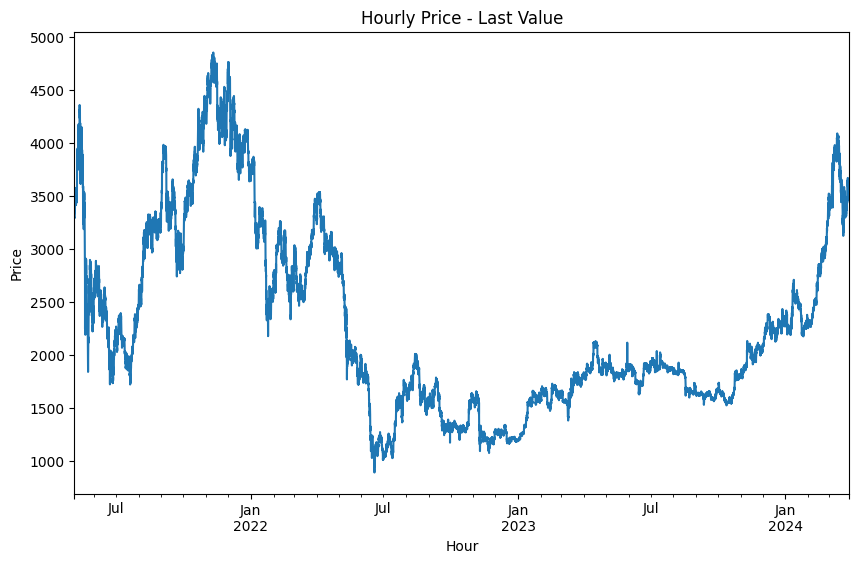

In [72]:
ax = puni_h.plot(figsize=(10, 6), title='Hourly Price - Last Value')
# ax.set_ylim(0, 10000)  # Set the limits of the y-axis to be from 0 to 5000
ax.set_xlabel('Hour')
ax.set_ylabel('Price')

In [73]:
puni_h.describe()

count    25406.000000
mean      2292.810791
std        883.933716
min        892.943420
25%       1636.442902
50%       1942.962463
75%       2922.961548
max       4852.204590
Name: price, dtype: float64

In [91]:
puni_h

timestamp
2021-05-05 01:00:00    3296.080078
2021-05-05 02:00:00    3296.080078
2021-05-05 03:00:00    3296.080078
2021-05-05 04:00:00    3296.080078
2021-05-05 05:00:00    3296.080078
                          ...     
2024-03-28 10:00:00    3570.042969
2024-03-28 11:00:00    3590.878174
2024-03-28 12:00:00    3591.190918
2024-03-28 13:00:00    3576.933350
2024-03-28 14:00:00    3574.273682
Freq: h, Name: price, Length: 25406, dtype: float32

In [79]:
volume_uni = uni['amountUSD'].resample('h').sum().shape

## Binance

In [80]:
bin = pd.read_parquet('data\ethusdc_binance.parquet.gzip')
bin = bin.set_index(bin.columns[0])

In [137]:
pbin_h = bin['Close'].resample('h').first()

In [138]:
pbin_h

Open Time
2021-05-01 04:00:00    2845.05
2021-05-01 05:00:00    2847.64
2021-05-01 06:00:00    2851.09
2021-05-01 07:00:00    2861.73
2021-05-01 08:00:00    2862.00
                        ...   
2024-03-28 00:00:00    3497.41
2024-03-28 01:00:00    3515.50
2024-03-28 02:00:00    3493.17
2024-03-28 03:00:00    3478.20
2024-03-28 04:00:00    3495.60
Freq: h, Name: Close, Length: 25489, dtype: float64

In [139]:
df = pd.concat([puni_h, pbin_h], axis=1, keys=['puni_h', 'pbin_h'])
# common_start = max(df.index.min(), df.index.min())  # Assuming both series have the same index

# # Step 3: Trim the DataFrame to start from the common start date
# df = df[df.index >= common_start]

# # Step 4 (Optional): Fill missing values. For example, forward fill
# df = df.fillna(method='ffill')

# # Now, df is aligned starting from the common start date, with missing values handled as desired


In [140]:
df_puni_h = puni_h.to_frame(name='puni_h')
df_pbin_h = pbin_h.to_frame(name='pbin_h')
df_combined = pd.merge(df_puni_h, df_pbin_h, left_index=True, right_index=True, how='outer')


start_date = df_combined.dropna().index.min()
end_date = df_combined.dropna().index.max()

df_common_period = df_combined[(df_combined.index >= start_date) & (df_combined.index <= end_date)]

In [141]:
start_date

Timestamp('2021-05-05 01:00:00')

<Axes: >

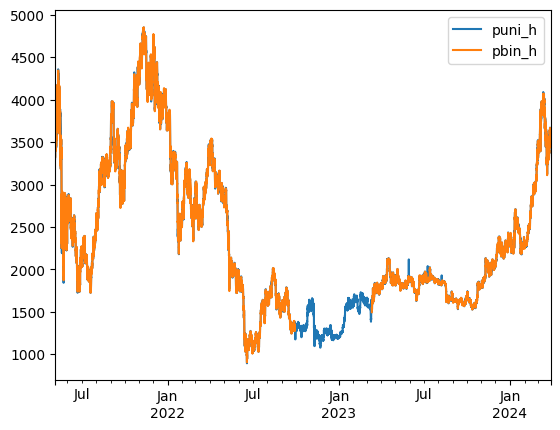

In [142]:
df_common_period.plot()

In [143]:
df_common_period

,puni_h,pbin_h
2021-05-05 01:00:00,3296.080078,3314.58
2021-05-05 02:00:00,3296.080078,3366.20
2021-05-05 03:00:00,3296.080078,3314.71
2021-05-05 04:00:00,3296.080078,3302.54
2021-05-05 05:00:00,3296.080078,3251.97
...,...,...
2024-03-28 00:00:00,3507.867188,3497.41
2024-03-28 01:00:00,3498.230713,3515.50
2024-03-28 02:00:00,3510.526855,3493.17
2024-03-28 03:00:00,3485.522461,3478.20


In [150]:
df_common_period[df_common_period['pbin_h'].isnull()].tail(50)

,puni_h,pbin_h
2023-03-10 05:00:00,1412.428467,NaN
2023-03-10 06:00:00,1416.663940,NaN
2023-03-10 07:00:00,1404.284302,NaN
2023-03-10 08:00:00,1413.453979,NaN
2023-03-10 09:00:00,1402.976807,NaN
2023-03-10 10:00:00,1395.991211,NaN
2023-03-10 11:00:00,1383.000977,NaN
2023-03-10 12:00:00,1387.925171,NaN
2023-03-10 13:00:00,1400.191162,NaN
2023-03-10 14:00:00,1422.915039,NaN


In [2]:
import requests
from datetime import datetime, timedelta
import pandas as pd

# Configuration
symbol = "ETHUSDc"  # Example symbol
interval = "1h"  # Daily interval
day_str = "10 Mar 2023"  # Day for query

# Convert day_str to startTime and endTime
day = datetime.strptime(day_str, "%d %b %Y")
start_time = int(day.timestamp() * 1000)
end_time = int((day + timedelta(days=1)).timestamp() * 1000) - 1

# Binance API request
url = "https://api.binance.com/api/v3/klines"
params = {
    'symbol': symbol,
    'interval': interval,
    'startTime': start_time,
    'endTime': end_time,
}
response = requests.get(url, params=params)
data = response.json()

# Assuming `data` is the list of lists you've fetched from the API
columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore']
df = pd.DataFrame(data, columns=columns)

# Convert timestamps to readable dates
df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
df['Close Time'] = pd.to_datetime(df['Close Time'], unit='ms')

# Convert numeric strings to floats or integers as appropriate
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume']
df[numeric_columns] = df[numeric_columns].astype(float)
df['Number of Trades'] = df['Number of Trades'].astype(int)


In [3]:
df

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore
